#### Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


from sklearn.impute import KNNImputer

In [2]:
data = pd.read_csv('learningSet.csv')
data.head()

/var/folders/bh/f8xvxphx21xcjth6jlc7q5yr0000gn/T/ipykernel_59669/687616697.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

### Check for null values in the numerical columns.

In [3]:
numerical= data.select_dtypes(np.number)
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [4]:
#Chcking null values

nulls = pd.DataFrame(round(100*numerical.isna().sum()/len(numerical)))
nulls

,0
ODATEDW,0.0
TCODE,0.0
DOB,0.0
AGE,25.0
NUMCHLD,87.0
...,...
TARGET_B,0.0
TARGET_D,0.0
HPHONE_D,0.0
RFA_2F,0.0


In [5]:
nulls.columns = ["nulls_proportion"]
nulls

,nulls_proportion
ODATEDW,0.0
TCODE,0.0
DOB,0.0
AGE,25.0
NUMCHLD,87.0
...,...
TARGET_B,0.0
TARGET_D,0.0
HPHONE_D,0.0
RFA_2F,0.0


In [6]:
nulls = nulls.rename_axis("columns").reset_index()
nulls

,columns,nulls_proportion
0,ODATEDW,0.0
1,TCODE,0.0
2,DOB,0.0
3,AGE,25.0
4,NUMCHLD,87.0
...,...,...
402,TARGET_B,0.0
403,TARGET_D,0.0
404,HPHONE_D,0.0
405,RFA_2F,0.0


In [7]:
#I want to see the null cols

nulls[nulls.nulls_proportion>0] 

,columns,nulls_proportion
3,AGE,25.0
4,NUMCHLD,87.0
5,INCOME,22.0
6,WEALTH1,47.0
8,MBCRAFT,55.0
...,...,...
385,RAMNT_22,78.0
386,RAMNT_23,92.0
387,RAMNT_24,81.0
398,NEXTDATE,10.0


### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [8]:
#Let's check the correlation first

numerical.corrwith(numerical['TARGET_D']).sort_values(ascending=False)

TARGET_D    1.000000
TARGET_B    0.774232
RAMNT_4     0.268811
RAMNT_21    0.099339
RAMNT_9     0.090168
              ...   
RDATE_3    -0.125194
RDATE_5    -0.220455
RAMNT_5    -0.272147
ADATE_5          NaN
ADATE_15         NaN
Length: 407, dtype: float64

In [9]:
#corr_matrix=numerical.corr(method='pearson')  
#fig, ax = plt.subplots(figsize=(10, 8))
#ax = sns.heatmap(corr_matrix, annot=True)
#plt.show()

#### GEOCODE2

Geo Cluster Code indicating the level geography at which a record matches the census data. A nominal or symbolic field. Blank=No code has been assigned or did not match at any level.

In [10]:
# I can't find  GEOCODE2 in the numerical df so I try cheking it in the data
#Don't understand why the dtype is int64 while the values are clearly strings


data['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [11]:
data['GEOCODE2'].unique()

array(['C', 'A', 'D', 'B', ' ', nan], dtype=object)

In [12]:
data['GEOCODE2'].isnull().sum()

132

#### ADI

Area of Dominant Influence (ADI) is the geographic area or market reached by a certain radio or television station.

In [13]:
numerical['ADI'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

In [14]:
numerical['ADI'].isnull().sum()

132

#### DMA


A Designated Market Area (often referred to as DMA) is an advertising term that stands for different regions in the United States divided into separate marketing areas. There are 210 distinct regions and each Designated Market Area has a 3-digit numeric code (e.g. Los Angeles' DMA code is 803).

In [15]:
numerical['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64

In [16]:
numerical['DMA'].isnull().sum()

132

#### MSA

Metropolitan statistical areas (MSA) are delineated by the U.S. Office of Management and Budget (OMB) as having at least one urbanized area with a minimum population of 50,000.

In [17]:
numerical['MSA'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 298, dtype: int64

In [18]:
numerical['MSA'].isnull().sum()

132

#### ADI (Area of Dominant Influence), DMA (Designated Market Area ) and MSA(Metropolitan statistical areas) all show geographical areas and these 3 like GEOCODE2 have 132 NaNs, so probabaly by dropin the NaNs of one of these columns we will exclude the NaNs in other three columns. 

In [19]:
data.dropna(subset=['GEOCODE2'], inplace=True)

In [20]:
print("GEOCODE2 NaNs:", data['GEOCODE2'].isnull().sum())
print("ADI NaNs:", data['ADI'].isnull().sum())
print("DMA NaNs:", data['DMA'].isnull().sum())
print("MSA NaNs:", data['MSA'].isnull().sum())


GEOCODE2 NaNs: 0
ADI NaNs: 0
DMA NaNs: 0
MSA NaNs: 0


In [21]:
data['GEOCODE2'].unique()

array(['C', 'A', 'D', 'B', ' '], dtype=object)

In [22]:
#Replacing the spaces with unknowns

data['GEOCODE2'] = data['GEOCODE2'].replace(' ', 'unknown')

data['GEOCODE2'].unique()

array(['C', 'A', 'D', 'B', 'unknown'], dtype=object)

#### WEALTH1

Wealth Rating

In [23]:
numerical['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [24]:
numerical['WEALTH1'].isnull().sum()

44732

In [25]:
# % of NaN values in Wealth


round(numerical['WEALTH1'].isna().sum()/numerical.shape[0],2)

0.47

#### I want to create a copy of the numerical df with the featues that I think have a significan timpact on Wealth1 col: INCOME, WEALTH2, HHP1(Median Person Per Household),HHP2 (Average Person Per Household), RHP2 (Average Number of Rooms per Housing Unit), IC1 (Median Household Income in hundreds), IC2 (Median Family Income in hundreds), IC6, IC7, IC8, IC9, IC10, IC11, IC12, IC13, IC4, IC15, IC16, IC17, IC18, IC19, IC20, IC21, IC22, IC23 (income cols)

Then I want to use KNN imputer and impute the NaNs in 'WEALTH1' using all the features in this new df named: numerical_importan_for_WEALTH1


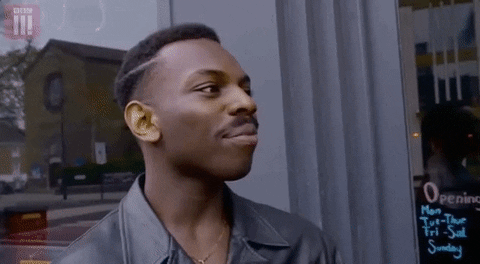

In [26]:
numerical_importan_for_WEALTH1 = numerical[['INCOME', 'WEALTH2', 'HHP1', 'HHP2', 'RHP2', 'IC1', 'IC2', 'IC6', 'IC7', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12', 'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC20', 'IC21', 'IC22', 'IC23', 'WEALTH1']].copy()

In [27]:
target_column = 'WEALTH1'

In [28]:
missing_count = numerical_importan_for_WEALTH1[target_column].isnull().sum()
missing_count

44732

In [30]:
# Using the KNN Imputation method
K = 5
imputer = KNNImputer(n_neighbors=K, weights='uniform', metric='nan_euclidean')
imputed_values = imputer.fit_transform(numerical_importan_for_WEALTH1)

imputed_df = pd.DataFrame(imputed_values, columns=numerical_importan_for_WEALTH1.columns)

In [31]:
imputed_df['WEALTH1'].unique()

array([5.8, 9. , 1. , 4. , 2. , 4.2, 6. , 4.8, 0. , 5. , 4.6, 2.6, 2.8,
       8. , 3. , 5.4, 7.2, 7. , 4.4, 7.8, 3.8, 8.6, 6.2, 2.4, 3.4, 7.6,
       1.2, 3.6, 1.6, 1.8, 8.4, 5.2, 5.6, 0.8, 6.8, 2.2, 3.2, 7.4, 0.4,
       1.4, 6.4, 0.6, 0.2, 8.2, 6.6, 8.8])

In [32]:
imputed_df['WEALTH1'].value_counts()

9.0    9355
8.0    7929
7.0    7366
6.0    6960
5.0    6454
4.0    5960
3.0    5251
2.0    5078
1.0    4018
0.0    2869
4.4    1444
5.2    1217
4.6    1191
4.8    1164
3.4    1159
3.2    1154
4.2    1151
3.6    1143
6.6    1142
3.8    1105
6.2    1086
6.4    1084
7.2    1081
2.8    1078
5.6    1073
5.4    1066
6.8    1060
5.8    1055
7.4    1053
2.6    1028
7.8    1013
2.4    1010
7.6     961
8.2     914
2.2     910
1.8     833
1.6     830
8.4     808
8.8     749
8.6     727
1.4     722
1.2     713
0.8     439
0.6     367
0.4     335
0.2     307
Name: WEALTH1, dtype: int64

In [33]:
imputed_df['WEALTH1'].isnull().sum()

0

In [34]:
numerical['WEALTH1']=imputed_df['WEALTH1']

In [35]:
numerical['WEALTH1'].isnull().sum()

0